In [744]:
from skimage import io
from skimage.viewer import ImageViewer
from skimage import filters
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage.data import data_dir
from skimage.util import img_as_ubyte  
%matplotlib inline

In [1093]:
data_path = "/media/ayush/New Volume/ML/Projects/Mammo/database_image/"
data_path2 = "/media/ayush/New Volume/ML/Projects/Mammo/Segmented_Images/"
data_path3 = "/media/ayush/New Volume/ML/Projects/Mammo/Segmented_Images2/"
data_path4 = "/media/ayush/New Volume/ML/Projects/Mammo/Segmented_Images3/"

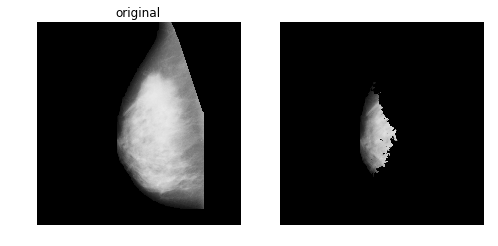

In [1092]:
img = cv2.imread(data_path2+'/mdb003.pgm')

I3 = remove_muscle2(img)
I2 = copy.deepcopy(I3)
val = filters.threshold_otsu(I2)
mask = I < val+70;
I2[mask==True]=0
plot_comparison(I3,I2,'')

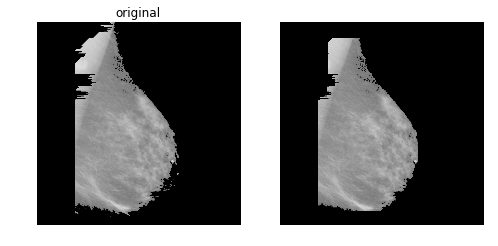

In [634]:
I3 = copy.deepcopy(I2)
mask = I2 < 120
I3[mask==True]=0
img_bw = 255*(cv2.cvtColor(I3, cv2.COLOR_BGR2GRAY) > 20).astype('uint8')

se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (120,120))
mask = cv2.morphologyEx(img_bw, cv2.MORPH_CLOSE, se1)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)

mask = np.dstack([mask, mask, mask]) / 255
out = I3 * mask
plot_comparison(I3,out,'')


In [635]:
def remove_artifcats(img_path):
    img = cv2.imread(img_path)
    img_bw = 255*(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) > 20).astype('uint8')

    se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
    se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (120,120))
    mask = cv2.morphologyEx(img_bw, cv2.MORPH_CLOSE, se1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)

    mask = np.dstack([mask, mask, mask]) / 255
    out = img * mask

#     cv2.imwrite('output.png', out)
#     plot_comparison(img, img_bw, 'out')
#     plot_comparison(img, out, 'out')
    return out

In [122]:
#cropping artifacts
rootDir = data_path
for dirName, subdirList, fileList in os.walk(rootDir):
    ##print('Found directory: %s' % dirName)
    for fname in fileList:
        if(fname[-3:]=='pgm'):
            img_path = dirName+'/'+fname
            #print img_path
            #I1 = io.imread(img_path)
            I3 = remove_artifcats(img_path)
            #I3=np.concatenate((I1,I2),axis=1)
            io.imsave(data_path2+fname,I3)
            
            

In [27]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')

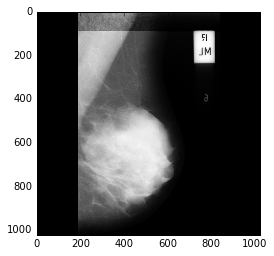

In [29]:
I1 = img_as_ubyte(io.imread(data_path+'/mdb002.pgm', as_grey=True))
fig, ax = plt.subplots()
ax.imshow(I1, cmap=plt.cm.gray)

In [86]:
selem = disk(6)
eroded = erosion(out, selem)
plot_comparison(out, eroded, 'erosion')

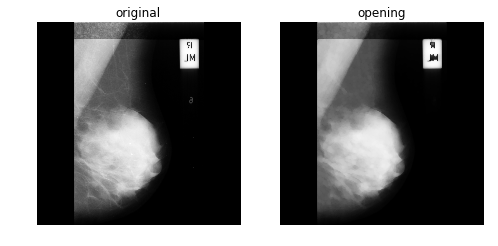

In [41]:
selem = disk(6)
opened = opening(I1, selem)
plot_comparison(I1, opened, 'opening')

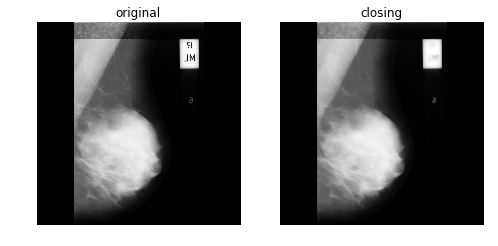

In [53]:
closed = closing(I1, selem)
plot_comparison(I1, closed, 'closing')

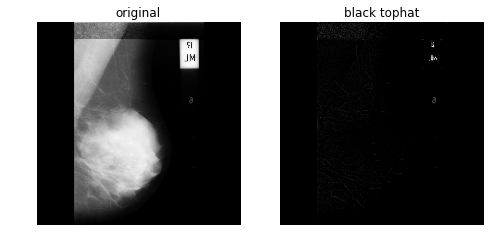

In [47]:
selem = disk(5)
w_tophat = white_tophat(I1, selem)
plot_comparison(I1, w_tophat, 'black tophat')

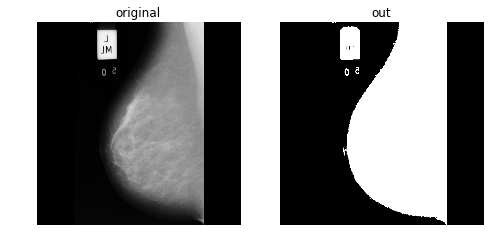

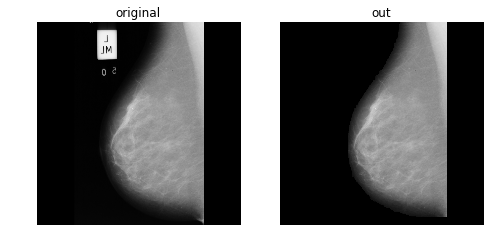

In [120]:
import cv2
import numpy as np

img = cv2.imread(data_path+'/mdb247.pgm')
img_bw = 255*(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) > 20).astype('uint8')

se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (120,120))
mask = cv2.morphologyEx(img_bw, cv2.MORPH_CLOSE, se1)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)

mask = np.dstack([mask, mask, mask]) / 255
out = img * mask

# cv2.imshow('Output', out)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('output.png', out)
plot_comparison(img, img_bw, 'out')
plot_comparison(img, out, 'out')


(1024, 1024, 3)

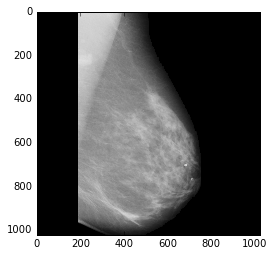

In [240]:
img = cv2.imread(data_path2+'/mdb008.pgm')
plt.imshow(img)
img.shape

In [183]:
img = cv2.imread(data_path2+'/mdb106.pgm')

I2 = copy.deepcopy(img)
flag = 0
cnt=0
for i in range(img.shape[0]):
    if(flag):
        break
    for j in range(img.shape[1]):
    
        if img[i][j][0]==0:
            cnt+=1
        else :
            flag=1
            break
chc = float(cnt)/img.shape[1]
if(chc<0.35):
    print 'left'
else:
    print 'right'
plt.imshow(I2)


In [739]:
def reverse_image(img):

    I2 = copy.deepcopy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]/2):
            tmp = img[i][img.shape[1]-1-j][0]
            tmp2 = img[i][j][0]
            I2[i][img.shape[1]-1-j] = [tmp2,tmp2,tmp2]
            I2[i][j] = [tmp,tmp,tmp]
    return I2


In [602]:
def remove_muscle(img):
    
    I2 = copy.deepcopy(img)
    flag = 0
    cnt=0
    for i in range(img.shape[0]):
        if(flag):
            break
        for j in range(img.shape[1]):

            if img[i][j][0]==0:
                cnt+=1
            else :
                flag=1
                break
    chc = float(cnt)/img.shape[1]
    if(chc>0.35):
        img =  reverse_image(img)
        return reverse_image(remove_muscle_help(img))
    else:
        return remove_muscle_help(img)
    

In [707]:
def remove_muscle_help(img):

    I2 = copy.deepcopy(img) 
    flag = 0
    prev=None
    for i in range(img.shape[0]):
        if(flag):
            break
        lst=[]
        for j in range(img.shape[1]-5):
        #print img[i][j][0],img[i][j+2][0],abs(img[i][j][0]-img[i][j+2][0])
            if(( (abs(int(img[i][j][0])-int(img[i][j+2][0]))<12) and img[i][j][0]>140) or img[i][j][0]<10  ):
                #print img[i][j]
                if(img[i][j][0]>10):
                    #print img[i][j]
                    lst.append([i,j])
            else:
                if(0):
                    print img[i][j][0],img[i][j+2][0],(i,j),len(lst),abs(int(img[i][j][0])-int(img[i][j+2][0]))
                if(prev!=None and abs(len(prev)-len(lst))>40):
                    #print img[i][j][0],(i,j),len(lst),len(prev)
                    for k in range(len(prev)):
                        I2[i][prev[k][1]]=[0,0,0]
                    prev=prev[:]
                else:

                    if(i!=0 and len(lst)<2):
                        flag=1
                    if(prev!=None and len(lst)>len(prev)):
                        lst = lst[:len(prev)]
                    for k in range(len(lst)):
                        I2[lst[k][0]][lst[k][1]]=[0,0,0]
                    prev=lst
                break

    return I2

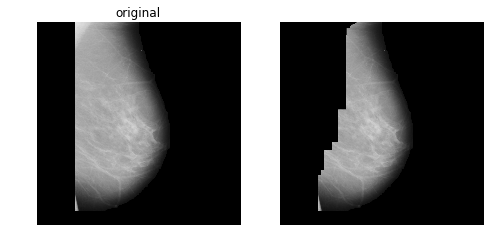

In [689]:
img = cv2.imread(data_path2+'/mdb024.pgm')
I = remove_muscle(img)
plot_comparison(img, I, '')

188 181 (0, 352) 163 7
205 212 (1, 192) 3 7
184 176 (2, 354) 165 8
178 167 (3, 355) 166 11
179 171 (4, 354) 165 8
178 171 (5, 354) 165 7
182 173 (6, 353) 164 9
213 204 (7, 289) 100 9
175 165 (8, 354) 165 10
177 170 (9, 353) 164 7


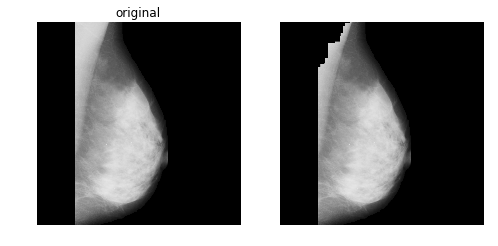

In [746]:
img = cv2.imread(data_path2+'/mdb004.pgm')
#img = reverse_image(img)
I2 = copy.deepcopy(img) 
flag = 0
prev=None
cnt=0
for i in range(img.shape[0]):
       
        if(flag):
            break
        lst=[]
        for j in range(img.shape[1]-5):
            #print img[i][j][0],img[i][j+2][0],abs(int(img[i][j][0])-int(img[i][j+2][0]))
            if((( (abs(int(img[i][j][0])-int(img[i][j+2][0]))<7) and img[i][j][0]>140)) or img[i][j][0]<10 ):
                #print (i,j)
                if(img[i][j][0]>10):
                    #print img[i][j]
                    lst.append([i,j])
            else:
                if(i<10):
                    print img[i][j][0],img[i][j+2][0],(i,j),len(lst),abs(int(img[i][j][0])-int(img[i][j+2][0]))
                if(prev!=None and abs(len(prev)-len(lst))>40):
                    #print img[i][j][0],(i,j),len(lst),len(prev)
                    for k in range(len(prev)):
                        I2[i][prev[k][1]]=[0,0,0]
                    prev=prev[:]
                else:
    
                    if(i>=10 and len(lst)<2):
                        flag=1
                    if(prev!=None and len(lst)>len(prev)):
                        lst = lst[:len(prev)]
                    for k in range(len(lst)):
                        I2[lst[k][0]][lst[k][1]]=[0,0,0]
                    prev=lst
                break
                
plot_comparison(img, I2, '')

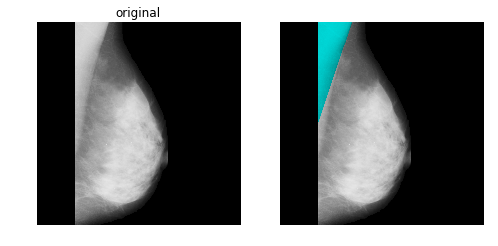

In [1078]:
img = cv2.imread(data_path2+'/mdb004.pgm')
#img = reverse_image(img)
I2 = copy.deepcopy(img)
wn_size=5
flag=0
prev=10000
for i in range(img.shape[0]-wn_size):
    cnt=0
    if(flag):
        break
    for j in range(img.shape[1]-wn_size):
        if(img[i][j][0]!=0):
            sm=0
            for l in range(wn_size):
                for m in range(wn_size):
                    sm+=int(img[i+l][j+m][0])
            #print sm
            if(sm>3200 and ( ((i%3==0)and(j<prev-1)) or (((i%3))and(j<prev)) ) and 
               abs(int(img[i][j][0])-int(img[i+wn_size-1][j+wn_size-1][0]))<250 ):
                #print sm
                cnt+=1
                for l in range(wn_size):
                    for m in range(wn_size):
                        I2[i+l][j+m][0]=0

            else:
                if(cnt<2):
                    flag=1
                prev=j
                break
                

plot_comparison(img, I2, '')


In [1080]:
def remove_muscle2(img):
    
    I2 = copy.deepcopy(img)
    flag = 0
    cnt=0
    for i in range(img.shape[0]):
        if(flag):
            break
        for j in range(img.shape[1]):

            if img[i][j][0]==0:
                cnt+=1
            else :
                flag=1
                break
    chc = float(cnt)/img.shape[1]
    if(chc>0.35):
        img =  reverse_image(img)
        return reverse_image(remove_muscle_help2(img))
    else:
        return remove_muscle_help2(img)
    

In [1082]:
def remove_muscle_help2(img):
    
    I2 = copy.deepcopy(img)
    wn_size=5
    flag=0
    prev=10000
    for i in range(img.shape[0]-wn_size):
        cnt=0
        if(flag):
            break
        for j in range(img.shape[1]-wn_size):
            if(img[i][j][0]!=0):
                sm=0
                for l in range(wn_size):
                    for m in range(wn_size):
                        sm+=int(img[i+l][j+m][0])
                #print sm
                if(sm>3200 and ( ((i%3==0)and(j<prev-1)) or (((i%3))and(j<prev)) ) and 
                   abs(int(img[i][j][0])-int(img[i+wn_size-1][j+wn_size-1][0]))<250 ):
                    #print sm
                    cnt+=1
                    for l in range(wn_size):
                        for m in range(wn_size):
                            I2[i+l][j+m]=[0,0,0]

                else:
                    if(cnt<2):
                        flag=1
                    prev=j
                    break
                

    return I2

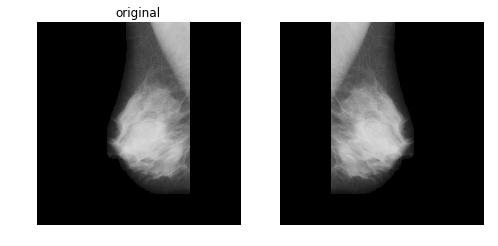

In [600]:
img = cv2.imread(data_path2+'/mdb001.pgm')
I2 = copy.deepcopy(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        tmp = img[i][img.shape[1]-1-j][0]
        I2[i][j] = [tmp,tmp,tmp]
plot_comparison(img, I2, '')


In [ ]:
rootDir = data_path2
for dirName, subdirList, fileList in os.walk(rootDir):
    ##print('Found directory: %s' % dirName)
    for fname in fileList:
        if(fname[-3:]=='pgm'):
            img_path = dirName+'/'+fname
            #print aimg_path
            #I1 = io.imread(img_path)
            img = cv2.imread(img_path)
            I2 = remove_muscle2(img)
            io.imsave(data_path4+fname,I2)
            
            